# Model Development Life Cycle (MDLC)

- **Requirements**
  - I want to build a predictor/classifier for survivors on Titanic
- **Design**
  - N/A
- **Collect**
  - use the Titanic-Dataset.csv from Kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download)
- Test, Tune, Train
- Deploy

# Collection


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('Titanic-Dataset.csv')
df.head()
len(df)

891

In [ ]:
df = df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df[df['Age'].isna() == False]['Age']

df = df.dropna()
len(df)

712

## Data Cleaning and Pre-processing

Notable Features:
- Pclass : represents the passenger class as 3,2, or 1, we know higher classed passengers got priority
- Sex : gender of the passenger, we know women got priority
- Age : age of the passenger in years, we know children and elders got priority
- SibSp : a count of number of siblings/spouse (horizontal relation)
- Parch : count of parent/children (vertical relation)
- Embarked : port of entry Southampton (S), Cherbourg (C), Queenstown (Q)
- Fare : dollars paid for trip

Features Removed:
- Cabin : not descriptive, can be represented by "Class"
- Ticket : acts as a unique ID, not useful

In [ ]:
# we are predicting the survived param (boolean 0 or 1)
# this is a classification problem

# notable params = Pclass (3, 2, 1), Sex (male, female), Age, SibSp, Parch, Embarked (S, C, Q)

df['Sex'].value_counts()

,count
Sex,
male,453
female,259


## Feature Visualization, Engineering and Selection


### Exploratory Data Analysis (EDA)

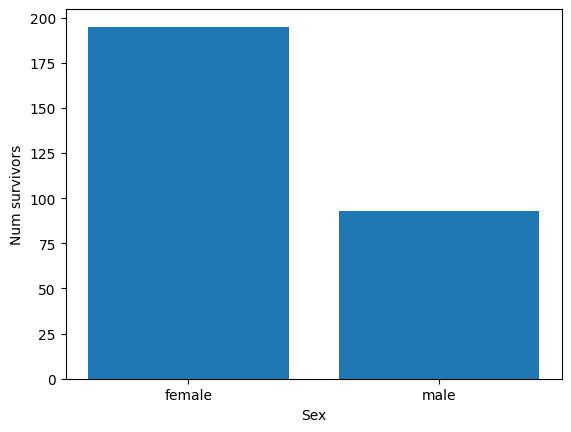

In [ ]:
import matplotlib.pyplot as plt

survivors_by_class = df[df['Survived'] == 1]['Sex'].value_counts().sort_index()
X = survivors_by_class.index
y = survivors_by_class.values

# plt.plot(X, y, "bo")
plt.bar(X, y, align='center')
plt.xlabel("Sex")
plt.ylabel("Num survivors")
plt.show()

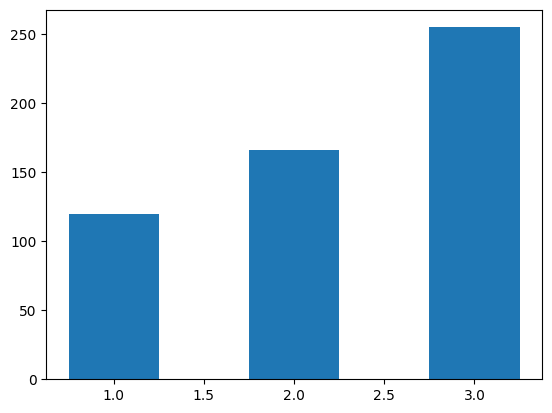

In [ ]:
survivors_by_class = df[df['Survived'] == 1]['Pclass']

plt.hist(
    x=survivors_by_class,
    bins=[1, 2, 3, 4],
    weights=survivors_by_class,
    histtype='bar',
    align='left',
    rwidth=0.5
)
plt.show()

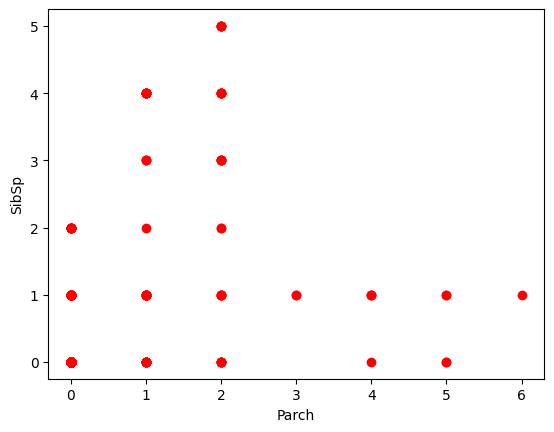

In [ ]:
plt.plot(
    df[df['Survived'] == 0]['Parch'],
    df[df['Survived'] == 0]['SibSp'],
    "ro"
)

plt.xlabel("Parch")
plt.ylabel("SibSp")

plt.show()

In [ ]:
from sklearn.feature_selection import r_regression

pearson_correlation_coefficient = r_regression(
    df[df['Survived'] == 0][['Parch']],
    df[df['Survived'] == 0]['SibSp'],
)

pearson_correlation_coefficient[0]

0.43403529179448475

From above we can tell there is no clear correlation between Parch and SibSp, but what if we combine them...

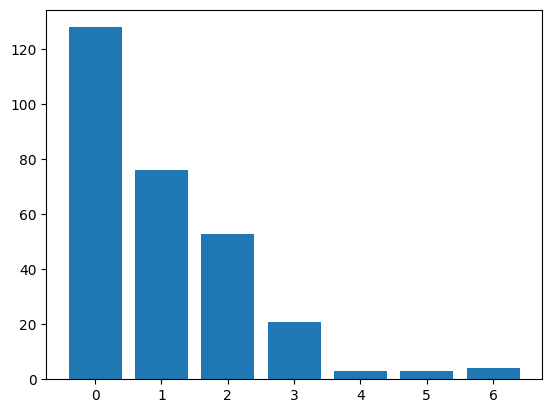

pearson coeff:  0.045067660482632645


In [ ]:
df['TotalFam'] = df['SibSp'] + df['Parch']
survivors_by_famcount = df[df['Survived'] == 1]['TotalFam'].value_counts().sort_index()


plt.bar(
    survivors_by_famcount.index,
    survivors_by_famcount.values,
)
plt.show()

pearson_correlation_coefficient = r_regression(
    df[['TotalFam']],
    df['Survived']
)

print("pearson coeff: ", pearson_correlation_coefficient[0])

Now this seems like there is a correlation here but, if you flip the survived boolean you will see a similar curve, explaining the low pearson score

In [ ]:
pearson_correlation_coefficient = r_regression(
    df[['Fare', 'Age']],
    df['Survived']
)
pearson_correlation_coefficient

array([ 0.2660996 , -0.08244587])

## Train Test Split

In [ ]:
X = pd.DataFrame(df.drop(['Survived'], axis=1))
y = pd.DataFrame(df['Survived'])
x_train, x_test, y_train, y_test = train_test_split(df, test_size=0.15)


x_train